## Importing the packages

In [2]:
import numpy as np
import pandas as pd
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/167.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.9 kB ? eta -:--:--
     --------------- --------------------- 71.7/167.9 kB 975.2 kB/s eta 0:00:01
     -------------------------------------- 167.9/167.9 kB 2.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB 10.9 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.8 MB 19.6 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/7.8 MB 26.1 MB/s eta 0:0


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading the dataset

In [4]:
brain_data=pd.read_csv("brain_stroke_new.csv")

In [5]:
brain_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5135,Female,64.0,0,0,Yes,Private,Urban,204.77,46.8,formerly smoked,1
5136,Male,52.0,1,0,Yes,Private,Urban,112.60,43.5,formerly smoked,1
5137,Male,60.0,0,0,Yes,Self-employed,Rural,118.03,36.5,smokes,1
5138,Male,67.0,1,1,Yes,Private,Rural,270.74,30.1,smokes,1


In [6]:
brain_data.shape

(5140, 11)

In [7]:
brain_data["stroke"].value_counts()

stroke
0    4733
1     407
Name: count, dtype: int64

### Checking the data types

In [8]:
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5140 entries, 0 to 5139
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5140 non-null   object 
 1   age                5140 non-null   float64
 2   hypertension       5140 non-null   int64  
 3   heart_disease      5140 non-null   int64  
 4   ever_married       5140 non-null   object 
 5   work_type          5140 non-null   object 
 6   Residence_type     5140 non-null   object 
 7   avg_glucose_level  5140 non-null   float64
 8   bmi                5121 non-null   float64
 9   smoking_status     5140 non-null   object 
 10  stroke             5140 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 441.8+ KB


In [9]:
brain_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5140.000000,5140.000000,5140.000000,5140.000000,5121.000000,5140.000000
mean,44.173798,0.103307,0.059533,106.823150,28.557801,0.079183
std,22.800080,0.304390,0.236643,45.973375,6.778912,0.270050
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,26.000000,0.000000,0.000000,77.287500,23.800000,0.000000
50%,46.000000,0.000000,0.000000,92.135000,28.200000,0.000000
75%,62.000000,0.000000,0.000000,114.762500,32.600000,0.000000
max,83.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Data pre-processing

In [10]:
brain_data["stroke"].value_counts()

stroke
0    4733
1     407
Name: count, dtype: int64

>Since the data is not balanced we need to create a dataset with balanced data.

In [11]:
resampled_0=brain_data[brain_data["stroke"]==0].head(400)
resampled_0

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
208,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
209,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
210,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
211,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
212,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
603,Male,40.0,0,0,Yes,Govt_job,Rural,100.26,26.0,Unknown,0
604,Male,82.0,0,0,Yes,Self-employed,Rural,56.75,21.0,never smoked,0
605,Female,58.0,0,0,Yes,Govt_job,Rural,77.46,27.6,never smoked,0
606,Male,12.0,0,0,No,children,Urban,76.26,20.5,never smoked,0


In [12]:
resampled_1=brain_data[brain_data["stroke"]==1].head(407)
resampled_1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5135,Female,64.0,0,0,Yes,Private,Urban,204.77,46.8,formerly smoked,1
5136,Male,52.0,1,0,Yes,Private,Urban,112.60,43.5,formerly smoked,1
5137,Male,60.0,0,0,Yes,Self-employed,Rural,118.03,36.5,smokes,1
5138,Male,67.0,1,1,Yes,Private,Rural,270.74,30.1,smokes,1


In [13]:
new_df = pd.concat([resampled_0,resampled_1],ignore_index=True)
new_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
802,Female,64.0,0,0,Yes,Private,Urban,204.77,46.8,formerly smoked,1
803,Male,52.0,1,0,Yes,Private,Urban,112.60,43.5,formerly smoked,1
804,Male,60.0,0,0,Yes,Self-employed,Rural,118.03,36.5,smokes,1
805,Male,67.0,1,1,Yes,Private,Rural,270.74,30.1,smokes,1


In [14]:
new_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  1
smoking_status       0
stroke               0
dtype: int64

In [15]:
new_df=new_df.dropna()
new_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
802,Female,64.0,0,0,Yes,Private,Urban,204.77,46.8,formerly smoked,1
803,Male,52.0,1,0,Yes,Private,Urban,112.60,43.5,formerly smoked,1
804,Male,60.0,0,0,Yes,Self-employed,Rural,118.03,36.5,smokes,1
805,Male,67.0,1,1,Yes,Private,Rural,270.74,30.1,smokes,1


In [16]:
new_df.rename(columns = {'bmi':'body_mass_index'}, inplace = True) 

In [17]:
new_df = new_df.astype({"age": 'int'})
new_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,body_mass_index,smoking_status,stroke
0,Male,3,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Female,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
802,Female,64,0,0,Yes,Private,Urban,204.77,46.8,formerly smoked,1
803,Male,52,1,0,Yes,Private,Urban,112.60,43.5,formerly smoked,1
804,Male,60,0,0,Yes,Self-employed,Rural,118.03,36.5,smokes,1
805,Male,67,1,1,Yes,Private,Rural,270.74,30.1,smokes,1


In [18]:
new_df.replace({'gender':{'Female':0,'Male':1}
                 ,'ever_married':{'No':0,'Yes':1}
                 ,'work_type':{'children':0,'Govt_job':1,'Private':2,'Self-employed':3}
                 ,'Residence_type':{'Rural':0,'Urban':1}
                 ,'smoking_status':{'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3}},inplace=True)

In [19]:
new_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,body_mass_index,smoking_status,stroke
0,1,3,0,0,0,0,0,95.12,18.0,3,0
1,1,58,1,0,1,2,1,87.96,39.2,1,0
2,0,8,0,0,0,2,1,110.89,17.6,3,0
3,0,70,0,0,1,2,0,69.04,35.9,0,0
4,0,52,0,0,1,2,1,77.59,17.7,0,0


In [20]:
X = new_df.drop(columns=['stroke'],axis=1)
Y = new_df['stroke']

In [21]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,body_mass_index,smoking_status
0,1,3,0,0,0,0,0,95.12,18.0,3
1,1,58,1,0,1,2,1,87.96,39.2,1
2,0,8,0,0,0,2,1,110.89,17.6,3
3,0,70,0,0,1,2,0,69.04,35.9,0
4,0,52,0,0,1,2,1,77.59,17.7,0


In [22]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.1,random_state=2)

In [24]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,body_mass_index,smoking_status
491,0,53,0,0,1,1,1,64.17,41.5,1
601,1,57,0,0,1,2,0,197.28,34.5,0
500,0,58,0,0,1,2,0,59.86,28.0,0
218,0,78,0,1,1,3,1,73.32,26.0,3
22,0,67,0,0,1,1,0,94.61,28.4,2
...,...,...,...,...,...,...,...,...,...,...
299,1,25,0,0,0,2,0,113.80,35.3,0
263,0,31,0,0,1,2,0,80.79,28.7,3
755,0,72,1,0,1,2,0,191.14,35.5,1
573,0,51,0,0,1,1,0,103.43,27.3,0


In [25]:
Y_test

491    1
601    1
500    1
218    0
22     0
      ..
299    0
263    0
755    1
573    1
394    0
Name: stroke, Length: 81, dtype: int64

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(806, 10) (725, 10) (81, 10)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
models = [LogisticRegression(random_state = 0),KNeighborsClassifier(n_neighbors=30),ExtraTreesClassifier(n_estimators=15, random_state=42,max_features="log2"),GaussianNB(),DecisionTreeClassifier(random_state = 0),RandomForestClassifier(random_state = 0)]
models_name=["Logistic Regression","KNeighbors Classifier","ExtraTrees Classifier","GaussianNB","DecisionTree Classifier","RandomForest Classifier"]

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score=[]
def compare_models(models):
    i=0
    for model in models:
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(X_test)
       
        accuracy = accuracy_score(Y_test, y_pred)
        classification_rep = classification_report(Y_test, y_pred)
        conf_matrix = confusion_matrix(Y_test, y_pred)
        score.append(accuracy)
        
        print(f"Accuracy of {models_name[i]}")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nConfusion Matrix:\n", conf_matrix)
        print("\nClassification Report:\n", classification_rep)
        print("------------------------------------------------------")
        i+=1

In [30]:
compare_models(models)

Accuracy of Logistic Regression
Accuracy: 0.7284

Confusion Matrix:
 [[28 12]
 [10 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72        40
           1       0.72      0.76      0.74        41

    accuracy                           0.73        81
   macro avg       0.73      0.73      0.73        81
weighted avg       0.73      0.73      0.73        81

------------------------------------------------------
Accuracy of KNeighbors Classifier
Accuracy: 0.7284

Confusion Matrix:
 [[25 15]
 [ 7 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69        40
           1       0.69      0.83      0.76        41

    accuracy                           0.73        81
   macro avg       0.74      0.73      0.72        81
weighted avg       0.74      0.73      0.73        81

------------------------------------------------------
Accuracy

In [31]:
score

[0.7283950617283951,
 0.7283950617283951,
 0.8395061728395061,
 0.7037037037037037,
 0.7283950617283951,
 0.7654320987654321]

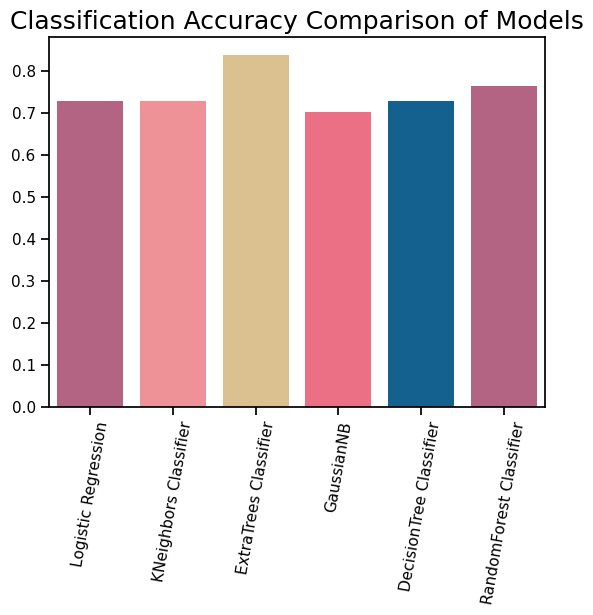

In [32]:
sns.set(context='notebook', style=None)
ax = sns.barplot(x=models_name, y=score, palette=['#C05780','#FF828B','#E7C582','#FF5C77','#0065A2'])
ax.set_title('Classification Accuracy Comparison of Models', fontsize=18)
for item in ax.get_xticklabels():
    item.set_rotation(80)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+1))

In [33]:
model=ExtraTreesClassifier(n_estimators=15, random_state=42,max_features="log2")

In [34]:
model.fit(X_train,Y_train)

ExtraTreesClassifier(max_features='log2', n_estimators=15, random_state=42)

In [35]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,body_mass_index,smoking_status
491,0,53,0,0,1,1,1,64.17,41.5,1
601,1,57,0,0,1,2,0,197.28,34.5,0
500,0,58,0,0,1,2,0,59.86,28.0,0
218,0,78,0,1,1,3,1,73.32,26.0,3
22,0,67,0,0,1,1,0,94.61,28.4,2
...,...,...,...,...,...,...,...,...,...,...
299,1,25,0,0,0,2,0,113.80,35.3,0
263,0,31,0,0,1,2,0,80.79,28.7,3
755,0,72,1,0,1,2,0,191.14,35.5,1
573,0,51,0,0,1,1,0,103.43,27.3,0


In [36]:
Y_test

491    1
601    1
500    1
218    0
22     0
      ..
299    0
263    0
755    1
573    1
394    0
Name: stroke, Length: 81, dtype: int64

In [37]:
#making a predictive system
input_data=(0,53,0,0,1,1,1,64.17,41.5,1)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("The person doesn\'t suffer brain stroke.")
else:
    print("The person suffers brain stroke.")

[1]
The person suffers brain stroke.


In [ ]:
#making a predictive system
input_data=(1,25,0,0,0,2,0,113.80,35.3,0)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("The person doesn\'t suffer brain stroke.")
else:
    print("The person suffers brain stroke.")

[0]
The person doesn't suffer brain stroke.


In [39]:
#making a predictive system
input_data=(0,72,1,0,1,2,0,1.264925,0.916983,1)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("The person doesn\'t suffer brain stroke.")
else:
    print("The person suffers brain stroke.")

[1]
The person suffers brain stroke.


In [40]:
#making a predictive system
input_data=(1,25,0,0,0,2,0,113.80,35.3,0)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("The person doesn\'t suffer brain stroke.")
else:
    print("The person suffers brain stroke.")

[0]
The person doesn't suffer brain stroke.


In [41]:
import pickle

In [42]:
filename='brainstroke_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [43]:
loaded_model=pickle.load(open("brainstroke_model.pkl",'rb'))

In [44]:
#making a predictive system
input_data=(1,25,0,0,0,2,0,113.80,35.3,0)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("The person doesn\'t suffer brain stroke.")
else:
    print("The person suffers brain stroke.")

[0]
The person doesn't suffer brain stroke.
